# EMG Signal for gesture recognition

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, optimizers, Input, Model
import matplotlib.pyplot as plt

So there are 11 columns. This is a Readme file from the actual dataset.https://archive.ics.uci.edu/ml/datasets/EMG+data+for+gestures

For recording patterns, we used a MYO Thalmic bracelet worn on a user’s forearm, and a PC with a Bluetooth receiver. The bracelet is equipped with eight sensors equally spaced around the forearm that simultaneously acquire myographic signals. The signals are sent through a Bluetooth interface to a PC.
We present raw EMG data for 36 subjects while they performed series of static hand gestures.The subject performs two series, each of which consists of six (seven) basic gestures. Each gesture was performed for 3 seconds with a pause of 3 seconds between gestures.

Description of raw_data _*** file
Each file consist of 10 columns:
1-) Time - time in ms;
2-9) Channel - eight EMG channels of MYO Thalmic bracelet;
10 Class –the label of gestures:

0 - unmarked data,

1 - hand at rest,

2 - hand clenched in a fist,

3 - wrist flexion,

4 – wrist extension,

5 – radial deviations,

6 - ulnar deviations,

7 - extended palm (the gesture was not performed by all subjects).

Along with this, I have just added "label" column that refers to the subject who performed the experiment. There were 36 subjects, each performed 7 gestures twice.

### Load the dataset

In [2]:
dataset_path = './EMG-data.csv'
df = pd.read_csv(dataset_path)
df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [3]:
print("class :", df["class"].unique())
print()
print("Labels :",df["label"].unique()) # 36 people hand gesture data
print()
print("Value Count :\n",df["class"].value_counts())

class : [0 1 2 3 4 5 6 7]

Labels : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]

Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


### Remove the unmarked data from dataset

In [4]:
df = df[df['class'] != 0]
df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,2400,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1,1
2288,2401,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2289,2402,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2290,2403,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1
2291,2404,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1,1


For the x data label, class and time values are not necessary

In [5]:
print("class :", df["class"].unique())
print()
print("Labels :",df["label"].unique()) # 36 people hand gesture data
print()
print("Value Count :\n",df["class"].value_counts())

class : [1 2 3 4 5 6 7]

Labels : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]

Value Count :
 class
6    253009
5    251733
4    251570
1    250055
3    249494
2    243193
7     13696
Name: count, dtype: int64


### Create X values

In [6]:
X = df.drop(columns=["label","class","time"])
display(X.head())

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002


### Create y values

In [7]:
y = df["class"]
print(y.unique())

[1 2 3 4 5 6 7]


### Split the data

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Normalize the datas

In [9]:
# Normalizing data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [10]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### Create plot function

In [11]:
# creating a function for plotting

def plot(loss,val_loss,acc,val_acc):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()
    plt.show()

### Create neural network

In [12]:
input_tensor = Input(shape=(8,))
x = layers.Dense(1024, activation='relu')(input_tensor)
y = layers.Dense(512, activation='relu')(x)
z = layers.Dense(256, activation='relu')(y)
z = layers.Dense(128, activation='relu')(z)
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
z = layers.Dense(128, activation='relu')(y) # acyclic graghs of layers
z = layers.Dense(64, activation='relu')(z)
z = layers.Dense(32, activation='relu')(z)
output_tensor = layers.Dense(8, activation='softmax')(z)

model = Model(input_tensor, output_tensor)

#SGD #RMSprop #Adam #Adadelta #Adagrad ##Adamax ###Nadam #Ftrl
opt = optimizers.Nadam(learning_rate=1e-3)
model.compile(optimizer = opt, 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

#model.summary()

### Train the model

Epoch 1/30


1891/1891 [==============================] - 49s 24ms/step - loss: 0.8889 - accuracy: 0.6598 - val_loss: 0.8304 - val_accuracy: 0.6801
Epoch 2/30
1891/1891 [==============================] - 37s 19ms/step - loss: 0.8116 - accuracy: 0.6867 - val_loss: 0.7934 - val_accuracy: 0.6926
Epoch 3/30
1891/1891 [==============================] - 36s 19ms/step - loss: 0.7771 - accuracy: 0.6997 - val_loss: 0.7619 - val_accuracy: 0.7042
Epoch 4/30
1891/1891 [==============================] - 37s 19ms/step - loss: 0.7376 - accuracy: 0.7154 - val_loss: 0.7256 - val_accuracy: 0.7208
Epoch 5/30
1891/1891 [==============================] - 38s 20ms/step - loss: 0.6922 - accuracy: 0.7345 - val_loss: 0.6779 - val_accuracy: 0.7404
Epoch 6/30
1891/1891 [==============================] - 46s 24ms/step - loss: 0.6425 - accuracy: 0.7556 - val_loss: 0.6343 - val_accuracy: 0.7606
Epoch 7/30
1891/1891 [==============================] - 45s 24ms/step - loss: 0.5935 - accuracy: 0.7773 - val_loss: 0.5936

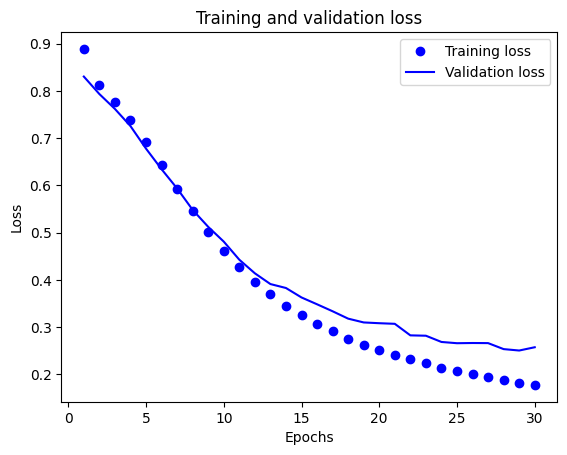

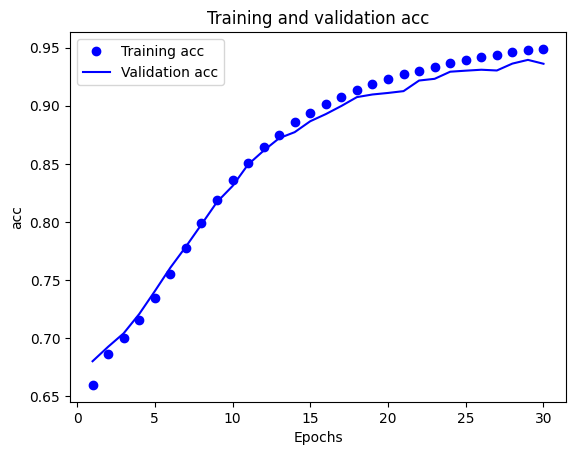

In [14]:
batch_size = 512            
epochs = 30                

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs = epochs,
                    validation_split = 0.2)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

### Save the model as .h5 file

In [16]:
# loading saved model
emg = './emg_model_1_7.h5'
model.save(emg)

c:\Users\bedirhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


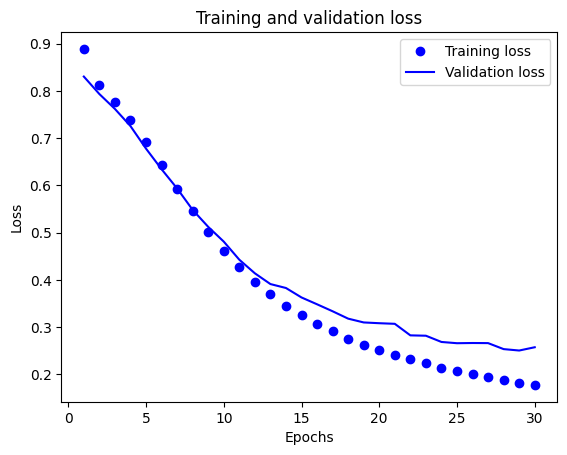

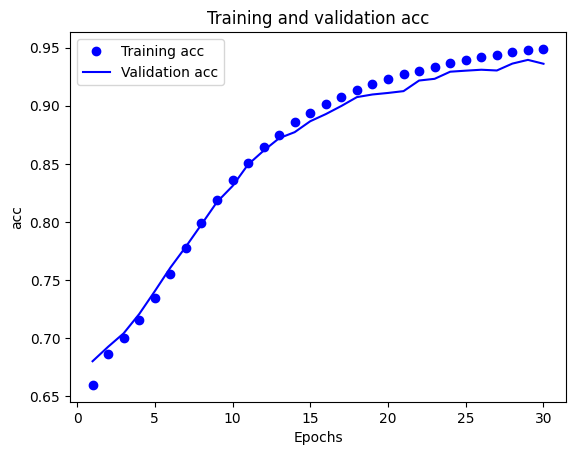

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plot(loss,val_loss,acc,val_acc)

### Evalueate the model

In [19]:
evaluation = model.evaluate(x_test,  y_test,batch_size=batch_size, verbose=2)
print()
print("Test loss :",evaluation[0]*100,"%")
print("Test accuracy :",evaluation[1]*100,"%")

591/591 - 6s - loss: 0.2515 - accuracy: 0.9369 - 6s/epoch - 11ms/step

Test loss : 25.152069330215454 %
Test accuracy : 93.69195103645325 %
